<a href="https://colab.research.google.com/github/usehgal/Health-Recommendation-System-/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load the dataset
data = pd.read_csv('Training.csv')

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
data.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [ ]:
data.shape

(4920, 133)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.dtypes

,0
itching,int64
skin_rash,int64
nodal_skin_eruptions,int64
continuous_sneezing,int64
shivering,int64
...,...
inflammatory_nails,int64
blister,int64
red_sore_around_nose,int64
yellow_crust_ooze,int64


In [ ]:
data.isnull().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [ ]:
label_encoder = LabelEncoder()
data['prognosis'] = label_encoder.fit_transform(data['prognosis'])

In [ ]:
# Split data into features and target
X = data.drop(columns=['prognosis'])
y = data['prognosis']

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [ ]:
data.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,27


In [ ]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,20.000000
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,11.833362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000


In [ ]:
# Adding slight noise to the dataset
def add_noise(data, noise_level=0.01):
    noisy_data = data.copy()
    for col in noisy_data.columns:
        noise = np.random.binomial(1, noise_level, size=noisy_data[col].shape)
        noisy_data[col] = np.where(noise == 1, 1 - noisy_data[col], noisy_data[col])  # Flip 0s to 1s and vice versa
    return noisy_data

# Introduce noise in the symptom columns
X_noisy = add_noise(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (3936, 132) (3936,)
Testing set shape: (984, 132) (984,)


In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality to capture 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
models = {
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=3),  # Use a smaller k to increase sensitivity
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=10, learning_rate=0.1),  # Lower n_estimators
    "Random Forest": RandomForestClassifier(n_estimators=10, max_depth=15)  # Lower max_depth to reduce complexity
}

# Train and evaluate the models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
svc_model = SVC(kernel='linear', probability=True)  # Use 'linear' or other kernel as needed
svc_model.fit(X_train_pca, y_train)

# Make predictions
y_pred = svc_model.predict(X_test_pca)

In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
    

In [ ]:
# Print confusion matrix and additional metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


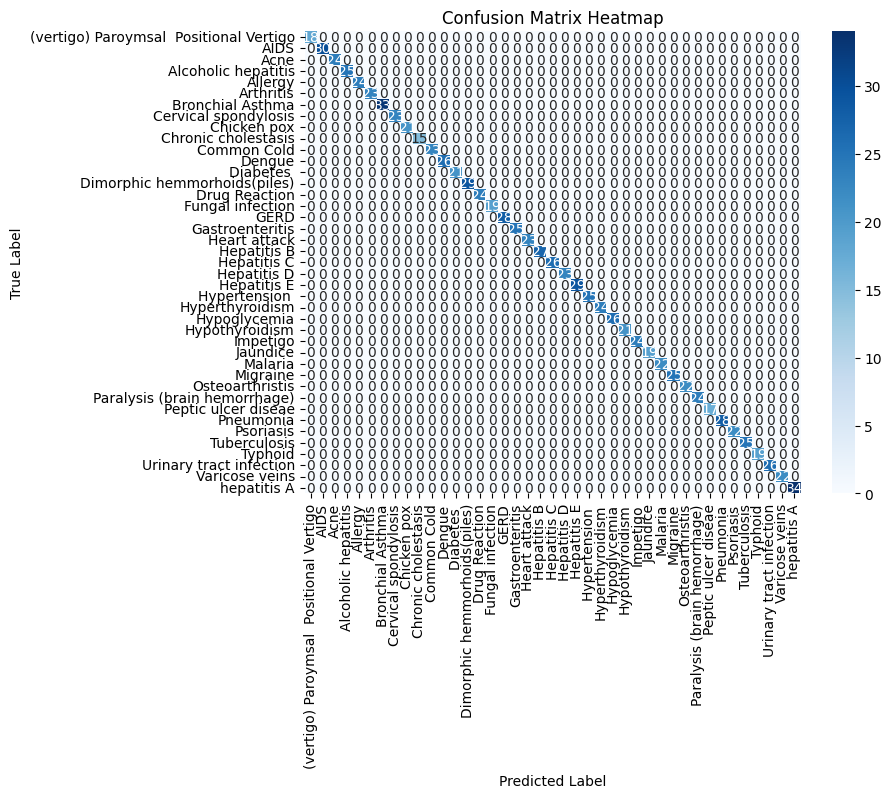

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, PrecisionRecallDisplay

# Generate predictions
y_pred = svc_model.predict(X_test_pca)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [ ]:
# Load additional datasets for recommendations
description_df = pd.read_csv('description.csv')
precautions_df = pd.read_csv('precautions_df.csv')
medications_df = pd.read_csv('medications.csv')
workout_df = pd.read_csv('workout_df.csv')
diets_df = pd.read_csv('diets.csv')


In [ ]:
# Scale and apply PCA to training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)

# Train SVC model on PCA-transformed data
svc_model_pca = SVC(kernel='linear', probability=True)
svc_model_pca.fit(X_train_pca, y_train)


SVC(kernel='linear', probability=True)

In [ ]:
def get_recommendations(symptoms):
    # Create a symptom vector based on input
    symptom_vector = np.zeros(len(X.columns))

    for symptom in symptoms:
        if symptom in X.columns:
            index = X.columns.get_loc(symptom)
            symptom_vector[index] = 1

    # Convert symptoms input to DataFrame
    symptoms_df = pd.DataFrame([symptom_vector], columns=X.columns)

    # Apply PCA transformation
    symptoms_scaled = scaler.transform(symptoms_df)
    symptoms_pca = pca.transform(symptoms_scaled)

    # Predict the disease
    predicted_disease = svc_model_pca.predict(symptoms_pca)[0]
    predicted_disease = label_encoder.inverse_transform([predicted_disease])[0]

    # Fetch recommendations based on predicted disease
    description = description_df.loc[description_df['Disease'] == predicted_disease, 'Description'].values[0]
    precautions = precautions_df.loc[precautions_df['Disease'] == predicted_disease]
    precautions_list = precautions[[col for col in precautions.columns if 'Precaution' in col]].values.flatten()
    precautions_list = [p for p in precautions_list if pd.notna(p)]
    medications = medications_df.loc[medications_df['Disease'] == predicted_disease, 'Medication'].values[0]
    workout = workout_df.loc[workout_df['disease'] == predicted_disease, 'workout'].values[0]
    diet = diets_df.loc[diets_df['Disease'] == predicted_disease, 'Diet'].values[0]

    return {
        "Disease": predicted_disease,
        "Description": description,
        "Precautions": precautions_list,
        "Medications": medications,
        "Workout": workout,
        "Diet": diet
    }


In [ ]:
# Input symptoms from the user
user_symptoms = input_symptoms()

# Get recommendations for the given symptoms
try:
    recommendations = get_recommendations(user_symptoms)
    print("\nPredicted Disease:", recommendations["Disease"])
    print("Description:", recommendations["Description"])
    print("Precautions:", recommendations["Precautions"])
    print("Medications:", recommendations["Medications"])
    print("Workout:", recommendations["Workout"])
    print("Diet:", recommendations["Diet"])
except Exception as e:
    print("Error:", e)


Enter symptoms separated by commas (e.g., fever, cough): itching,skin_rash,nodal_skin_eruptions

Predicted Disease: Fungal infection
Description: Fungal infection is a common skin condition caused by fungi.
Precautions: ['bath twice', 'use detol or neem in bathing water', 'keep infected area dry', 'use clean cloths']
Medications: ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
Workout: Avoid sugary foods
Diet: ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


In [ ]:
# Input symptoms from the user
user_symptoms = input_symptoms()

# Get recommendations for the given symptoms
try:
    recommendations = get_recommendations(user_symptoms)
    print("\nPredicted Disease:", recommendations["Disease"])
    print("Description:", recommendations["Description"])
    print("Precautions:", recommendations["Precautions"])
    print("Medications:", recommendations["Medications"])
    print("Workout:", recommendations["Workout"])
    print("Diet:", recommendations["Diet"])
except Exception as e:
    print("Error:", e)


Enter symptoms separated by commas (e.g., fever, cough): yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister

Predicted Disease: Impetigo
Description: Impetigo is a highly contagious skin infection causing red sores that can break open.
Precautions: ['soak affected area in warm water', 'use antibiotics', 'remove scabs with wet compressed cloth', 'consult doctor']
Medications: ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']
Workout: Maintain good hygiene
Diet: ['Impetigo Diet', 'Antibiotic treatment', 'Fruits and vegetables', 'Hydration', 'Protein-rich foods']
